## LDA (Linear Discriminant Analysis):
 
 * Supervised Dimensionality Reduction
 * Projects the input data into linear subspace consisting of the direction which maximizes the the separation between classes
 * Most useful in multiclass settings
 * Often used in finance

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
df = sns.load_dataset('iris')
# Removing setosa since it is somewhat separated already
df = df[df['species'] != 'setosa']

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [4]:
species_dict = {'versicolor':0, 'virginica':1}

In [5]:
df['species'] = df['species'].map(lambda x: species_dict[x])

In [6]:
X = df[['petal_length', 'petal_width']]

In [7]:
y = df['species']

In [11]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [12]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

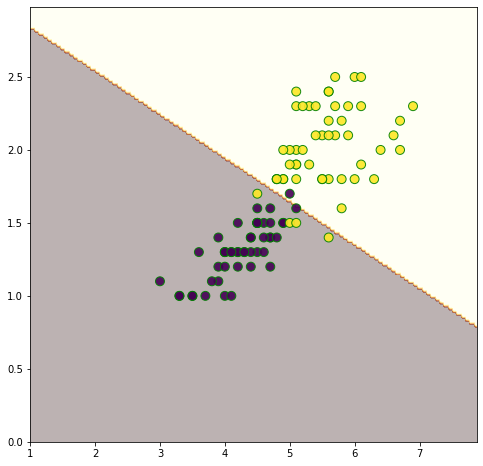

In [13]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8, 8))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)

plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

## Difference Between LDA and PCA
* PCA: Identifies the combination of attributes (principal components) that account for the most variance in the data.
* LDA: Tries to identify attributes that account for the most variance between classes; this is why it is supervised. LDA uses known class labels.

PCA:  First component that explains the most is usually PCA_1. NOte that PCA_2 is alway orthogonal to PCA_1